# Task 1: Data Preparation

In [1]:
# Install important packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data source file 
file_path = "rainfall.csv"
rainfall_df = pd.read_csv(file_path, sep=',', decimal='.', header=0)
rainfall_df.head()

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0


In [3]:
rainfall_df.tail()

,Year,Month,Day,Rainfall amount (millimetres)
3860,2023,12,27,3.0
3861,2023,12,28,0.8
3862,2023,12,29,0.0
3863,2023,12,30,0.0
3864,2023,12,31,0.6


## Dataset overview

In [4]:
"""
Get overview of the dataset
Findings:
- Total rows: 3865
- Month and day column: 3864 rows -> missing 1 value
- Rainfall amount has 3860 rows -> missing 5 values
"""
rainfall_df.count()

Year                             3865
Month                            3864
Day                              3864
Rainfall amount (millimetres)    3860
dtype: int64

In [5]:
# Get data type of each column
rainfall_df.dtypes

Year                               int64
Month                             object
Day                               object
Rainfall amount (millimetres)    float64
dtype: object

In [6]:
# Get descriptive statistics
'''
Anomalies:
- Min rainfall is a negative number
- Max rainfall is exceptionally high number 
--> These factors could affect the average rainfall, and the standard deviation
- Max year is 2027, whereas the data period is 2013-2023 
'''
rainfall_df.describe().round(2)

,Year,Rainfall amount (millimetres)
count,3865.00,3860.00
mean,2018.20,27.48
std,3.06,1609.54
min,2013.00,-10.00
25%,2016.00,0.00
50%,2018.00,0.00
75%,2021.00,1.00
max,2027.00,100000.00


## Examine data entry errors 

### Data type entry errors

In [7]:
'''
The Day and Month columns are of object types -> Possibility of mixed values (numeric and non-numeric)
Day column:
- the day is 'nine' --> meaningful value -> manually convert it into numeric value
Month column:
- the months are April and Jan -> meaningful value but mismatch the type due to human error ->
rainfall amount can contribute values to the mean -> convert them into numeric values 
'''
# Check if Day column has non-numeric values
def is_numeric_data(df, col):
    return df[col].str.isnumeric()
nonnumeric_days = rainfall_df.loc[is_numeric_data(rainfall_df, 'Day') == False]
nonnumeric_days

,Year,Month,Day,Rainfall amount (millimetres)
2198,2019,6,nine,0.0


In [8]:
# Check if Month column has non-numeric values
nonnumeric_months = rainfall_df.loc[is_numeric_data(rainfall_df, 'Month') == False]
nonnumeric_months

,Year,Month,Day,Rainfall amount (millimetres)
1409,2017,April,11,15.4
1698,2018,Jan,25,0.0


### Handle data type entry errors

In [9]:
# Replace nine to 9 in Day column
rainfall_df['Day'].replace('nine', int(9), inplace=True)
rainfall_df.iloc[2198]

Year                             2019
Month                               6
Day                                 9
Rainfall amount (millimetres)     0.0
Name: 2198, dtype: object

In [10]:
# Replace Aprile and Jan in Month column by numeric value accordingly
rainfall_df['Month'].replace('April', 4, inplace=True)
rainfall_df['Month'].replace('Jan', 1, inplace=True)

In [11]:
"""
Convert Day and Month columns into int type for further processing
"""
# Fill nan values with -1  
rainfall_df['Day'].fillna(-1, inplace=True)
# Convert Day column type to int type
rainfall_df['Day'] = rainfall_df['Day'].astype(str).astype(int)
# Replace -1 with nan values
rainfall_df['Day'].replace(-1, np.nan, inplace=True)

In [12]:
# Fill nan values with -1  
rainfall_df['Month'].fillna(-1, inplace=True)
# Convert Day column type to int type
rainfall_df['Month'] = rainfall_df['Month'].astype(str).astype(int)
# Replace -1 with nan values
rainfall_df['Month'].replace(-1, np.nan, inplace=True)

### Other possible entry mistakes

In [13]:
'''
Consider the maximum value of Year column is 2017 -> out of 2013-2023 range
Examine out of range values for Year column
Findings:
- Except for 2013, other years have 365 values presenting days in a year, apart from 2017 
- The entry for 2027 might fall into 2017 
Solution
- Convert 2027 into 2017 to supplement the missing entry for 2017 
'''
rainfall_df['Year'].value_counts()

2016    366
2020    366
2014    365
2018    365
2022    365
2015    365
2019    365
2021    365
2023    365
2017    364
2013    213
2027      1
Name: Year, dtype: int64

In [14]:
rainfall_df.loc[rainfall_df['Year'] == 2027]

,Year,Month,Day,Rainfall amount (millimetres)
1404,2027,4.0,6.0,0.0


In [15]:
# Examine nearby rows --> Entry error for 2027 
rainfall_df.iloc[1400:1410]

,Year,Month,Day,Rainfall amount (millimetres)
1400,2017,4.0,2.0,0.4
1401,2017,4.0,3.0,0.0
1402,2017,4.0,4.0,0.0
1403,2017,4.0,5.0,0.0
1404,2027,4.0,6.0,0.0
1405,2017,4.0,7.0,0.0
1406,2017,4.0,8.0,0.0
1407,2017,4.0,9.0,10.6
1408,2017,4.0,10.0,25.4
1409,2017,4.0,11.0,15.4


In [16]:
# Solution: Convert 2027 to 2017
rainfall_df['Year'].replace(2027, 2017, inplace=True)
rainfall_df.iloc[1400:1410]

,Year,Month,Day,Rainfall amount (millimetres)
1400,2017,4.0,2.0,0.4
1401,2017,4.0,3.0,0.0
1402,2017,4.0,4.0,0.0
1403,2017,4.0,5.0,0.0
1404,2017,4.0,6.0,0.0
1405,2017,4.0,7.0,0.0
1406,2017,4.0,8.0,0.0
1407,2017,4.0,9.0,10.6
1408,2017,4.0,10.0,25.4
1409,2017,4.0,11.0,15.4


In [17]:
"""
Anomalies in Day column: Day 48 and Day 200
Solution: Examine the observations in the related month and see if there are any missing days
"""
rainfall_df['Day'].value_counts()

19.0     127
3.0      127
26.0     127
16.0     127
28.0     127
11.0     127
8.0      127
17.0     127
15.0     127
25.0     127
23.0     127
5.0      127
18.0     127
27.0     127
2.0      127
13.0     127
7.0      127
12.0     127
6.0      127
21.0     127
24.0     127
14.0     127
9.0      127
22.0     127
4.0      126
10.0     126
20.0     126
1.0      126
29.0     119
30.0     117
31.0      74
48.0       1
200.0      1
Name: Day, dtype: int64

In [18]:
rainfall_df.loc[(rainfall_df['Day'] == 200) | (rainfall_df['Day'] == 48)]

,Year,Month,Day,Rainfall amount (millimetres)
1714,2018,2.0,48.0,0.0
3853,2023,12.0,200.0,1.4


In [19]:
rainfall_df.loc[(rainfall_df['Month'] == 12) & (rainfall_df['Year'] == 2023)]

,Year,Month,Day,Rainfall amount (millimetres)
3834,2023,12.0,1.0,4.6
3835,2023,12.0,2.0,2.8
3836,2023,12.0,3.0,7.0
3837,2023,12.0,4.0,0.0
3838,2023,12.0,5.0,0.0
3839,2023,12.0,6.0,0.0
3840,2023,12.0,7.0,0.0
3841,2023,12.0,8.0,0.0
3842,2023,12.0,9.0,2.6
3843,2023,12.0,10.0,11.8


In [20]:
"""
Based on the rainfall data in Dec 2023, the missing day is 20 
Also, the rainfall amount of 1.4 can significantly contribute to the mean value 
-> Assumption that the mistaken value is actually 20 
Solution: Convert 200 into 20 
"""
rainfall_df['Day'].replace(200, 20, inplace=True)

In [21]:
# Same approach for Day = 48
rainfall_df.loc[(rainfall_df['Month'] == 2) & (rainfall_df['Year'] == 2018)]

,Year,Month,Day,Rainfall amount (millimetres)
1705,2018,2.0,1.0,0.2
1706,2018,2.0,2.0,0.0
1707,2018,2.0,3.0,0.0
1708,2018,2.0,4.0,0.0
1709,2018,2.0,5.0,0.0
1710,2018,2.0,6.0,0.0
1711,2018,2.0,7.0,0.0
1712,2018,2.0,8.0,0.0
1713,2018,2.0,9.0,0.0
1714,2018,2.0,48.0,0.0


In [22]:
# The missing day is day 10. So we assume that the mistaken value is 10
rainfall_df['Day'].replace(48, 10, inplace=True)

## Examine missing values

### Handle missing Day values

In [23]:
rainfall_df.loc[rainfall_df['Day'].isna()]

,Year,Month,Day,Rainfall amount (millimetres)
1736,2018,3.0,NaN,0.0


In [24]:
"""
Solution: 
- Check if the March 2018 has any missing day
- If there is, possibility that the NaN day is the missing day
- Replace the NaN value with the missing day
Findings:
- Missing Day 4
- Assume that the NaN is Day 4 
"""
rainfall_df.loc[(rainfall_df['Month'] == 3) & (rainfall_df['Year'] == 2018)]

,Year,Month,Day,Rainfall amount (millimetres)
1733,2018,3.0,1.0,0.8
1734,2018,3.0,2.0,0.4
1735,2018,3.0,3.0,0.0
1736,2018,3.0,NaN,0.0
1737,2018,3.0,5.0,0.0
1738,2018,3.0,6.0,0.0
1739,2018,3.0,7.0,0.0
1740,2018,3.0,8.0,0.0
1741,2018,3.0,9.0,0.0
1742,2018,3.0,10.0,0.0


In [25]:
rainfall_df['Day'].fillna(4, inplace=True)

### Handle missing Month values

In [26]:
rainfall_df.loc[rainfall_df['Month'].isna()]

,Year,Month,Day,Rainfall amount (millimetres)
2067,2019,NaN,29.0,0.0


In [27]:
"""
Approach: 
- Examine neighbor rows to get the month
- If the day is unique in the month -> possibly the month is the nan value
"""
rainfall_df.iloc[2060:2070]

,Year,Month,Day,Rainfall amount (millimetres)
2060,2019,1.0,22.0,0.0
2061,2019,1.0,23.0,0.0
2062,2019,1.0,24.0,0.0
2063,2019,1.0,25.0,0.0
2064,2019,1.0,26.0,0.0
2065,2019,1.0,27.0,0.0
2066,2019,1.0,28.0,0.0
2067,2019,NaN,29.0,0.0
2068,2019,1.0,30.0,0.0
2069,2019,1.0,31.0,6.6


In [28]:
rainfall_df['Month'].fillna(1, inplace=True)

### Handle missing Rainfall values

In [29]:
rainfall_df.loc[rainfall_df['Rainfall amount (millimetres)'].isna()]

,Year,Month,Day,Rainfall amount (millimetres)
739,2015,6.0,11.0,NaN
1955,2018,10.0,9.0,NaN
1956,2018,10.0,10.0,NaN
2958,2021,7.0,8.0,NaN
2959,2021,7.0,9.0,NaN


In [30]:
"""
Step:
- Examine the descriptive statistics, particularly the mean rainfall of the years affected by the nan values
- There are 5 missing values for all the years -> make assumption that these values have minor effect on the results
- Impute 0 value (the most common value in the dataset)

"""
rainfall_df['Rainfall amount (millimetres)'].fillna(0, inplace=True)

## Examine impossible values and outliers

In [31]:
"""
Based on the descriptive statistics, we can see two possible outliers:
- Minimum rainfall is -10 mm
- Maximum rainfall is 100,000 mm
According to http://www.bom.gov.au/climate/extreme/records.shtml:
- The data represents the real rainfall amount, assumed that it cannot be negative
- The highest daily rainfall data in Australia is approximately 900mm -> possibility that 100,000mm is an outlier
"""
rainfall_df.describe()

,Year,Month,Day,Rainfall amount (millimetres)
count,3865.000000,3865.000000,3865.000000,3865.000000
mean,2018.196636,6.661061,15.735058,27.445278
std,3.061167,3.432655,8.799979,1608.496125
min,2013.000000,1.000000,1.000000,-10.000000
25%,2016.000000,4.000000,8.000000,0.000000
50%,2018.000000,7.000000,16.000000,0.000000
75%,2021.000000,10.000000,23.000000,1.000000
max,2023.000000,12.000000,31.000000,100000.000000


In [32]:
"""
Solution: 
- Examine the years with the anomalous rainfall
-> 2019 is the affected year
- The outliers significantly affect the statistics of the year
-> Replace the outliers with the mode value, which is 0 
"""
rainfall_df.loc[rainfall_df['Rainfall amount (millimetres)'] == -10]

,Year,Month,Day,Rainfall amount (millimetres)
2158,2019,4.0,30.0,-10.0


In [33]:
rainfall_df.loc[rainfall_df['Rainfall amount (millimetres)'] == 100000]

,Year,Month,Day,Rainfall amount (millimetres)
2093,2019,2.0,24.0,100000.0


In [34]:
# Find the mode rainfall value in year 2019
rainfall_2019 = rainfall_df.loc[rainfall_df['Year'] == 2019]
mode_rainfall = rainfall_2019['Rainfall amount (millimetres)'].mode()

In [35]:
# Replace the outliers with the mode value
rainfall_df['Rainfall amount (millimetres)'].replace(-10, 0, inplace=True)
rainfall_df['Rainfall amount (millimetres)'].replace(100000, 0, inplace=True)

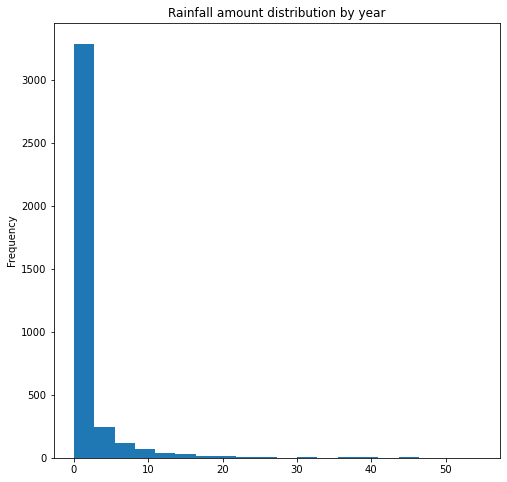

In [36]:
"""
Use boxplot to detect other anomalies for rainfall
"""
rainfall_df['Rainfall amount (millimetres)'].plot(kind='hist', bins=20, figsize=(8,8))
plt.title("Rainfall amount distribution by year")
plt.show()

In [37]:
# Apply the range to detect unusual rainfall values
mask_range = (rainfall_df['Rainfall amount (millimetres)'] < 0) | (rainfall_df['Rainfall amount (millimetres)'] > 900)
rainfall_df.loc[mask_range]

,Year,Month,Day,Rainfall amount (millimetres)


## Write data to csv file

# Task 2: Data Exploration

## Task 2.1

### Prepare DataFrame for 2014 data

In [52]:
# Extract rainfall data in 2014
raw_rainfall_2014 = rainfall_df.loc[rainfall_df['Year'] == 2014]

# Reshape the data frame as required
rainfall_2014 = raw_rainfall_2014.pivot(index='Day', columns='Month', values='Rainfall amount (millimetres)')
rainfall_2014

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Day,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,3.8,0.4,5.2,0.0,2.6,6.0,0.0
2.0,5.2,0.0,0.0,0.0,0.0,3.2,0.0,10.6,10.8,0.0,0.2,0.4
3.0,0.0,0.0,0.0,0.2,1.4,3.4,0.0,0.6,0.2,0.6,0.0,0.0
4.0,0.0,0.4,0.0,0.0,5.6,1.6,0.0,0.0,0.0,0.2,0.0,9.0
5.0,0.2,0.0,0.0,0.0,1.8,4.8,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.8,0.0,0.0,0.0,0.6,2.0,0.2,0.0,0.0,0.0,0.0,2.6
7.0,0.0,0.0,0.0,0.0,1.8,0.4,0.0,1.6,0.0,1.0,0.0,14.8
8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.6,0.0,1.0,0.0,2.2
9.0,0.0,0.0,0.0,13.4,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0


### Explore the highest daily rainfall each month

In [63]:
# Find the highest rainfall amount in each month 
highest_rainfall_values = rainfall_2014.max(axis=0, skipna=True)

In [62]:
# Find the day with the highest rainfall 
highest_rainfall_days = rainfall_2014.idxmax(axis=0)
highest_rainfall_days

Month
1.0     25.0
2.0     20.0
3.0     28.0
4.0     10.0
5.0     10.0
6.0     25.0
7.0     10.0
8.0      2.0
9.0     25.0
10.0    27.0
11.0    16.0
12.0     7.0
dtype: float64

In [64]:
# Create a DataFrame with the highest rainfall days
highest_rainfall_2014 = pd.DataFrame({'Highest rainfall day': highest_rainfall_days})

# Join the DataFrame with the corresponding Series
highest_rainfall_2014 = highest_rainfall_2014.join(highest_rainfall_values.rename('Rainfall amount'))
highest_rainfall_2014

,Highest rainfall day,Rainfall amount
Month,,
1.0,25.0,5.4
2.0,20.0,10.4
3.0,28.0,6.6
4.0,10.0,18.2
5.0,10.0,11.0
6.0,25.0,7.0
7.0,10.0,5.0
8.0,2.0,10.6
9.0,25.0,11.6


## Task 2.2

## Task 2.3

In [67]:
# Calculate the sum of rainfall amount of of each year
yearly_rainfall = pd.DataFrame(rainfall_df.groupby('Year')['Rainfall amount (millimetres)'].sum())
yearly_rainfall

,Rainfall amount (millimetres)
Year,
2013,380.2
2014,432.0
2015,439.2
2016,599.6
2017,602.0
2018,514.4
2019,374.4
2020,786.8
2021,682.6


In [76]:
# Sort the year from highest to lowest rainfall
yearly_rainfall.sort_values(by=['Rainfall amount (millimetres)'], ascending=False, inplace=True)
yearly_rainfall

,Rainfall amount (millimetres)
Year,
2020,786.8
2022,699.4
2021,682.6
2017,602.0
2016,599.6
2023,575.4
2018,514.4
2015,439.2
2014,432.0


### Top 3 years with highest rainfall amount

In [77]:
yearly_rainfall.head(3)

,Rainfall amount (millimetres)
Year,
2020,786.8
2022,699.4
2021,682.6


### Top 3 years with lowest rainfall amount

In [78]:
yearly_rainfall.tail(3)

,Rainfall amount (millimetres)
Year,
2014,432.0
2013,380.2
2019,374.4


## Task 2.4